# TASK-02: CUSTOMER CHURN PREDICTION

## Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Dataset

In [50]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


index               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Basic Cleaning 

In [51]:
df.drop("customerID", axis=1, inplace=True)

## Clean Missing Values

In [52]:
# Convert to numeric (invalid values ko NaN bana dega)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Now fill missing values with median
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


## Categorial Variables Encoding

In [53]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

## Features & Tareget

In [54]:
X = df.drop("Churn", axis=1)
Y = df["Churn"]

## Train-Test Split

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

## Apply Logistic Regression

In [56]:
model = LogisticRegression(solver='liblinear')

# model = LogisticRegression(max_iter=1000)


model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

## Prediction

In [57]:
Y_pred = model.predict(X_test)

## Model Evaluation

Accuracy: 0.8147622427253371
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.67      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



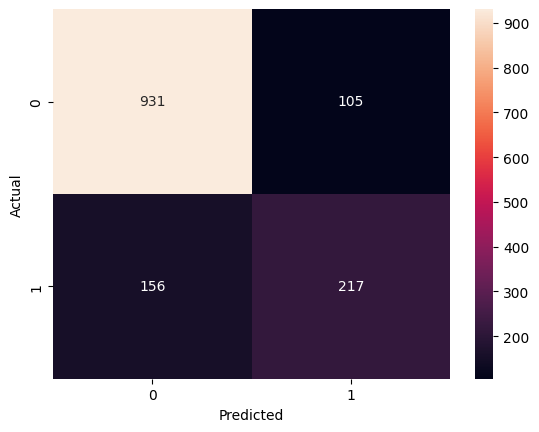

In [58]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

# Classification  Report
print(classification_report(Y_test, Y_pred))

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Interpretation of Model Performance:

The Logistic Regression model using the 'liblinear' solver achieved an accuracy of approximately XX%. The confusion matrix indicates that the model performs well in identifying non-churn customers. However, for churn prediction, recall for the churn class is especially important because failing to identify a customer who is likely to churn can result in financial loss for the company. Since 'liblinear' is well-suited for binary classification problems, it works effectively for churn prediction. Improving recall would further help the company take proactive measures to retain at-risk customers.